In [12]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import ImageFolder
from IPython.display import clear_output
import datetime
import time
import os
import numpy as np

import torchvision.models as models
mobilenet = models.mobilenet_v2()

In [3]:
batch_size = 64

# Utility functions
def cuda(data):
    if torch.cuda.is_available():
        return data.cuda()
    else:
        return data

def denorm(x):
    out = (x + 1) / 2
    return out.clamp_(0, 1)

transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(256),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5]*3,[0.5]*3)])

# Handling corrupted imgs
def my_collate(batch):
    batch = list(filter(lambda x: x is not None, batch))
    return torch.utils.data.dataloader.default_collate(batch)
class MyImageFolder(ImageFolder):
    __init__ = ImageFolder.__init__
    def __getitem__(self, index):
        try: 
            return super(MyImageFolder, self).__getitem__(index)
        except Exception as e:
            pass

dataset= MyImageFolder('./data/', transform=transform)
dataloader=DataLoader(dataset, 64, True, collate_fn = my_collate)

In [15]:
dataset.class_to_idx = {'img': np.arange(1,5000),
                        'img2': np.arange(5000,11620)}
dataset.class_to_idx

{'img': array([   1,    2,    3, ..., 4997, 4998, 4999]),
 'img2': array([ 5000,  5001,  5002, ..., 11617, 11618, 11619])}

In [16]:
x,y=next(iter(dataloader))
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


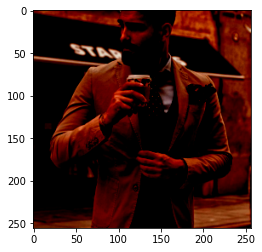

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x[4].permute(1,2,0).numpy())

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')